Functional API CNN Example - MNIST datasets

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model

(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train=x_train.reshape(-1, 28, 28, 1)
x_test=x_test.reshape(-1, 28, 28, 1)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

x_train = x_train / 255.0
x_test = x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


Functional API 코드에서 동일한 의미를 가지지만, 하나의 라인으로 표현할 수 있는 코드를 두 개의 라인으로 표현한 경우에 있어 일반 함수를 호출하는 경우로 혼동할 수 있음. 다음 코드는 Example 코드와 동일함

In [6]:
input_ = Input(shape=(28,28,1))

x = Conv2D(32, 3, activation='relu')
x = x(input_)

x = Conv2D(64, 3, activation='relu')(x)
x = MaxPool2D(pool_size=(2,2))(x)
x = Dropout(0.25)(x)

x = Flatten()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

output_ = Dense(10, activation='softmax')
output_ = output_(x)

cnn = Model(inputs=input_,  outputs=output_)

In [7]:
cnn.compile(loss='sparse_categorical_crossentropy',
            optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

cnn.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               1179

In [8]:
hist = cnn.fit(x_train, y_train, batch_size=128, 
               epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 35s 9ms/step - loss: 0.2399 - accuracy: 0.9275 - val_loss: 0.0482 - val_accuracy: 0.9840
Epoch 2/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0844 - accuracy: 0.9744 - val_loss: 0.0378 - val_accuracy: 0.9857
Epoch 3/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0648 - accuracy: 0.9800 - val_loss: 0.0328 - val_accuracy: 0.9899
Epoch 4/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0522 - accuracy: 0.9834 - val_loss: 0.0322 - val_accuracy: 0.9887
Epoch 5/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0452 - accuracy: 0.9861 - val_loss: 0.0291 - val_accuracy: 0.9906
Epoch 6/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0405 - accuracy: 0.9873 - val_loss: 0.0282 - val_accuracy: 0.9913
Epoch 7/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0353 - accuracy: 0.9883 - val_loss: 0.0292 - val_accuracy: 0.9904
Epoch

In [9]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0308 - accuracy: 0.9930


[0.030774803832173347, 0.9929999709129333]

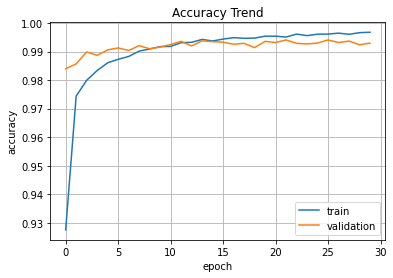

In [10]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

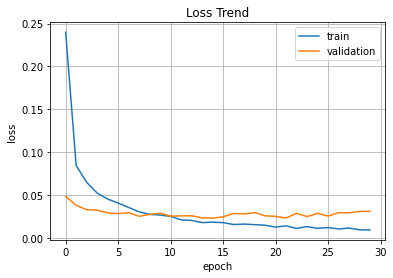

In [11]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()